# Random Forest

**Random Forest** is a statistical algorithm that is used to cluster points of data in groups.

It is an ensemble approach made up of decision trees.  This can can also be thought of as a form of nearest neighbor predictor.[^1]

**Ensembles** are groups of learners working together to create a strong learner.

We take ten bad models and can make one good model because their errors are not correlated with eachother due to them creating trees off of different chunks of data.


[^1]: http://blog.citizennet.com/blog/2012/11/10/random-forests-ensembles-and-performance-metrics


This is a very popular machine learning algorithm and the go to algorithm for a lot of users because it works pretty well on different types of datasets without much work.

#### Random forest is kind of universal.
- It can predict any kind, (categorical or continous) any columns, pixels, zip codes, revenues.
- In general, it doesn't overfit and if it does, it is easy to fix.
- Don't need a separate validation set.
- It has few if any statistical assumptions.
- It doesn't assume normal distributions, or linear.
- Not much feature engineering required.
- Doesn't need much math manipulation.

##### When is RF better than KNN?
- If the data has multiple useless variables (fast car, color of car doesn't matter), KNN will still care about them.

##### When is RF better than LR?
- It doesn't work in Euclidean space(distance) so it's not tied to assuming the data is linear
- The input variables may relate to the ouptut variable in non linear ways (x1$\cdot$x2 = y)

##### Cons
- Fast to train but slow to predict, so it may be too slow when real time predictions are needed (self driving cars, high frequency trading)

### Ensemble Example Image
![ensemble pic](https://blog.citizennet.com/hs-fs/hubfs/Imported_Blog_Media/skitch.png?t=1529595390188&width=482&name=skitch.png)
The gray ones are a good guess at the data but the red curve is much better.

### Random Forest with Decision Trees
![Simple Random Forest](https://d2wh20haedxe3f.cloudfront.net/sites/default/files/random_forest_diagram_complete.png)

### Decision Trees

![titanic](titanic_tree.png)

### Advantages of Decision Tress
 - Simple to understand, interpret and visualize.
 - Implicitly perform feature selection
 - Handles numerical or categorical data
 - Not much effort needed in setting up data.

### Disadvantages
 - May create overally complex trees that cause overfitting instead of generalizing the data.
 - They can become unstable because of small variations in data which can be fixed with methods known as bagging and boosting.
 - Because decision trees are **greedy** they go for the best answer for the next step, which may cause us to get stuck in a local minimum and not the global minimum that we want.

##### Decision Tree Example
We want to predict whether he will play tennis based on this data
![tennis](tennis.PNG)

Here is our initial tree structure.  When the sky is overcast, he has a 100% chance to play tennis.  This is called a pure subset.  Since the other choices lead to impure subsets, we should split them even further.
![playing](playingBaseball.PNG)

Once we split all the choices down into pure subsets, we can accurately predict what days John will play tennis.
![playing](baseballSplit.PNG)

This leads us to the simplified tree below.
![final](finalTree.PNG)

#### Decision Tree Code Example

In [1]:
# For reading in CSV files and data manipulation
import pandas as pd
# For math manipulation
import numpy as np

# Reading in Tennis Data.
tennis = pd.read_csv("tennis.csv")

print("Tennis data untouched:\n")
print(tennis)

# Using Day as index
tennis.set_index('Day', inplace=True)

# Saving copy of mostly untouched data
untouched_data = tennis

# Changing all categorical columns to numbers
for column in tennis.columns.values:
    tennis[column] = tennis[column].astype('category')

tennis = tennis.apply(lambda x: x.cat.codes)

# Splitting data into input data and output data
tennis_x = tennis.drop('Play', axis=1)
tennis_y = tennis['Play']

print("\n--------------------------------\nTennis Input Data with Categories: \n")
"""
Outlook:          Humidity:        Wind:            Play:
    Sunny = 2         High = 0         Weak = 1         No = 0
    Overcast = 0      Normal = 1       Strong = 0       Yes = 1
    Rain = 1
"""
print(tennis_x.head())
print("\n---------------------------------\nTennis Output Data with Categories: \n")
print(tennis_y.head())

Tennis data untouched:

    Day   Outlook Humidity    Wind Play
0     1     Sunny     High    Weak   No
1     2     Sunny     High  Strong   No
2     3  Overcast     High    Weak  Yes
3     4      Rain     High    Weak  Yes
4     5      Rain   Normal    Weak  Yes
5     6      Rain   Normal  Strong   No
6     7  Overcast   Normal  Strong  Yes
7     8     Sunny     High    Weak   No
8     9     Sunny   Normal    Weak  Yes
9    10      Rain   Normal    Weak  Yes
10   11     Sunny   Normal  Strong  Yes
11   12  Overcast     High  Strong  Yes
12   13  Overcast   Normal    Weak  Yes
13   14      Rain     High  Strong   No

--------------------------------
Tennis Input Data with Categories: 

     Outlook  Humidity  Wind
Day                         
1          2         0     1
2          2         0     0
3          0         0     1
4          1         0     1
5          1         1     1

---------------------------------
Tennis Output Data with Categories: 

Day
1    0
2    0
3    1
4   

In [2]:
# Training our decision tree model
from sklearn.tree import DecisionTreeClassifier
dtclf = DecisionTreeClassifier()
dtmodel = dtclf.fit(tennis_x, tennis_y)

In [3]:
# Visualizing our tree
import graphviz
import os
from sklearn.tree import export_graphviz

tree = export_graphviz(
    dtmodel,
    feature_names=tennis_x.columns,
    filled=True,
    rounded=True,
    out_file="tree.dot"
)

# Run this to print out image
# os.system('dot -Tpng tree.dot -o tree.png')

![tennistree](tennisTree.png)

### Breaking down our tree
![catCodes](catCodes.png)

#### Check when Outlook is Overcast
![overcast](tennistree1.png)

In [4]:
# First part of the tree tells us to split on whether the data is Overcast or not.
untouched_data[untouched_data['Outlook'] == 'Overcast'][['Outlook', 'Play']]
# When it's overcast, they will always play tennis.

# Add overcast False

,Outlook,Play
Day,,
3,Overcast,Yes
7,Overcast,Yes
12,Overcast,Yes
13,Overcast,Yes


#### Humidity Check after Outlook is not Overcast
![humidity](tennistree2.png)

In [5]:
# Outlook is not Overcast
untouched_data[untouched_data['Outlook'] != 'Overcast']

,Outlook,Humidity,Wind,Play
Day,,,,
1,Sunny,High,Weak,No
2,Sunny,High,Strong,No
4,Rain,High,Weak,Yes
5,Rain,Normal,Weak,Yes
6,Rain,Normal,Strong,No
8,Sunny,High,Weak,No
9,Sunny,Normal,Weak,Yes
10,Rain,Normal,Weak,Yes
11,Sunny,Normal,Strong,Yes


In [6]:
untouched_data[
    (untouched_data['Outlook'] != 'Overcast') & (untouched_data['Humidity'] == 'High')
]

,Outlook,Humidity,Wind,Play
Day,,,,
1,Sunny,High,Weak,No
2,Sunny,High,Strong,No
4,Rain,High,Weak,Yes
8,Sunny,High,Weak,No
14,Rain,High,Strong,No


![TennisTree4](tennisTree4.png)

### How is a decision tree split?

http://www.saedsayad.com/decision_tree.htm

https://medium.com/deep-math-machine-learning-ai/chapter-4-decision-trees-algorithms-b93975f7a1f1

http://dni-institute.in/blogs/cart-decision-tree-gini-index-explained/

**Gini impurity** is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset.

You can just choose from the set twice.  Once for the label, and once for the actual element.

Probability of not getting the same result twice in a row.

$$Gini = \sum_{i \neq j} p(i)p(j) = p(0) \times p(1) + p(1) \times p(0)$$

$$1 = \\ P(t_1) \times P(t_1) + \\ P(t_1) \times P(t_0) + \\ P(t_0) \times P(t_1) + \\ P(t_0) \times P(t_0)$$


$$1 - P(t_1) \times P(t_1) - P(t_0) \times P(t_0) = \\ P(t_1) \times P(t_0) + P(t_0) \times P(t_1)$$

$$Gini(t) = 1 - \sum^{t=1}_{t=0}P_t^2$$

$$ Gini(t) = 1 - P_{t=0}^2 - P_{t=1}^2 $$

This is what we use to choose what category to split on:

$$Gini(s, t) = Gini(t) - P_T \times Gini(t_T) - P_F \times Gini(t_F)$$
Where:
 - s: split
 - t: node
 - Gini(t): Gini index of input node t
 - $P_T$: Number of cases where s is true over total number of cases.
 - Gini($t_T$): Gini of Left(True) node after split, s
 - $P_F$: Total Number of cases where s is false over total number of cases.
 - Gini($t_F$): Gini of Right(False) Node after split, s
 


Let's find the gini impurity of the dependent variable.

In [7]:
x = untouched_data.groupby('Play').count()

x = x.drop(columns=['Outlook', 'Wind'])
x.rename(columns={'Humidity': 'Count'})

,Count
Play,
No,5
Yes,9


$$Gini(output) = 1 - (\frac{5}{14})^2 - (\frac{9}{14})^2$$

In [8]:
# Round to 3 decimal places
round(
    1.0 - ((5.0/(5.0+9.0))**2.0) - ((9.0/(5.0+9.0))**2.0),
    3
)
# Which is the same as the gini of the first node in the decision tree.

0.459

In [9]:
from IPython.display import HTML, display
import tabulate
table = [["","No","Yes", "Total"],
         ["Overcast",0,4, 4],
         ["Rain",2,3, 5],
         ["Sunny",3,2, 5],
         ["Total",5,9, 14]]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

,No,Yes,Total
Overcast,0,4,4
Rain,2,3,5
Sunny,3,2,5
Total,5,9,14


When Overcast:

$$Gini(Overcast, index) = Gini(index) - P_T \times Gini(OvercastIsTrue) - P_F \times Gini(OvercastIsFalse)$$

Gini(t) is 0.46.  Gini index of dependent variable:
$$Gini(Overcast, index) = 0.46 - P_T \times Gini(OvercastIsTrue) - P_F \times Gini(OvercastIsFalse)$$

Solving for inner Ginis:
$$Gini(OvercastIsTrue) = 1 - (\frac{0}{4})^2 - (\frac{4}{4})^2 = 0$$
$$Gini(OvercastIsFalse) = 1 - (\frac{5}{10})^2 - (\frac{5}{10})^2 = 0.5$$

We are left with:
$$Gini(Overcast, t) = 0.46 - P_T \times 0 - P_F \times 0.5)$$

Solving P's:
$$P_T = \frac{4}{14}$$

$$P_F = \frac{10}{14}$$

Pluging everything in gives us:

$$Gini(Overcast, index) = 0.46 - \frac{4}{14} \times 0 - \frac{10}{14} \times 0.5 = 0.103$$

In [10]:
# Wind
table = [["","No","Yes", "Total"],
         ["Strong", 3, 3, 6],
         ["Weak", 2, 6, 8],
         ["Total", 5, 9, 14]]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

,No,Yes,Total
Strong,3,3,6
Weak,2,6,8
Total,5,9,14


In [11]:
# Humidity
table = [["","No","Yes", "Total"],
         ["High", 4, 3, 7],
         ["Normal", 1, 6, 7],
         ["Total", 5, 9, 14]]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

,No,Yes,Total
High,4,3,7
Normal,1,6,7
Total,5,9,14


The rest for the first level:
 - Gini(Rain, index) = $0.46 - \frac{5}{14} \times [1 - (\frac{2}{5})^2 - (\frac{3}{5})^2] - \frac{9}{14} \times [1 - (\frac{3}{9})^2 - (\frac{6}{9})^2] = 0.003$
 - Gini(Sunny, index) = $0.46 - \frac{5}{14} \times [1 - (\frac{3}{5})^2 - (\frac{2}{5})^2] - \frac{9}{14} \times [1 - (\frac{2}{9})^2 - (\frac{7}{9})^2] = 0.066$
 - Gini(Wind, index) = $0.46 - \frac{6}{14} \times [1 - (\frac{3}{6})^2 - (\frac{3}{6})^2] - \frac{8}{14} \times [1 - (\frac{2}{8})^2 - (\frac{6}{8})^2] = 0.031$
 - Gini(Humidity, index) = $0.46 - \frac{7}{14} \times [1 - (\frac{4}{7})^2 - (\frac{3}{7})^2] - \frac{7}{14} \times [1 - (\frac{1}{7})^2 - (\frac{6}{7})^2] = 0.093$

In [12]:
untouched_data.groupby('Play').count()

,Outlook,Humidity,Wind
Play,,,
No,5,5,5
Yes,9,9,9


In [13]:
# when Overcast
overcast = untouched_data[untouched_data['Outlook'] == 'Overcast']
not_overcast = untouched_data[untouched_data['Outlook'] != 'Overcast']

In [14]:
def get_gini(df, output_column):
    # Grouping the table into two rows by the output data.
    df_copy = df.groupby(output_column).count()
    # Getting Column names
    col = df_copy.columns.values[0]
    # Counting total number of rows
    total = df_copy[col].sum()
    gini = 1.0
    for row in df_copy[col]:
        gini -= (1.0*row/total)**2
    return gini



gini_index = get_gini(untouched_data, 'Play')
print("Gini of root: %.3f" % gini_index)
print("Gini of data when overcast: %.3f" % get_gini(overcast, 'Play'))
print("Gini of data when not overcast: %.3f" % get_gini(not_overcast, 'Play'))

Gini of root: 0.459
Gini of data when overcast: 0.000
Gini of data when not overcast: 0.500


$$Gini(Humidity, 1st False Node) = Gini(1st False Node) - P_T \times Gini(High) - P_F \times Gini(Normal)$$


$$Gini(Humidity, 1st False Node) = 0.5 - P_T \times Gini(High) - P_F \times Gini(Normal)$$

In [15]:
high_humidity = not_overcast[not_overcast['Humidity'] == 'High']
normal_humidity = not_overcast[not_overcast['Humidity'] != 'High']

gini_high = get_gini(high_humidity, 'Play')
gini_normal = get_gini(normal_humidity, 'Play')

print("Gini of data when humidity is high: %.3f" % gini_high)
print("Gini of data when humidity is normal: %.3f" % gini_normal)

Gini of data when humidity is high: 0.320
Gini of data when humidity is normal: 0.320


$$Gini(Humidity, 1st False Node) = 0.5 - P_T \times 0.320 - P_F \times 0.320$$

In [16]:
not_overcast

,Outlook,Humidity,Wind,Play
Day,,,,
1,Sunny,High,Weak,No
2,Sunny,High,Strong,No
4,Rain,High,Weak,Yes
5,Rain,Normal,Weak,Yes
6,Rain,Normal,Strong,No
8,Sunny,High,Weak,No
9,Sunny,Normal,Weak,Yes
10,Rain,Normal,Weak,Yes
11,Sunny,Normal,Strong,Yes


$$Gini(Humidity, 1st False Node) = 0.5 - \frac{5}{10} \times 0.320 - \frac{5}{10} \times 0.320 = 0.18$$

The rest for the second level:
 - Gini(Rain, 1st False Node) = $0.5 - \frac{5}{10} \times [1 - (\frac{2}{5})^2 - (\frac{3}{5})^2] - \frac{5}{10} \times [1 - (\frac{3}{5})^2 - (\frac{2}{5})^2] = 0.02$
 - Gini(Sunny, 1st False Node) = $0.5 - \frac{5}{10} \times [1 - (\frac{3}{5})^2 - (\frac{2}{5})^2] - \frac{5}{10} \times [1 - (\frac{2}{5})^2 - (\frac{3}{5})^2] = 0.02$
 - Gini(Wind, 1st False Node) = $0.5 - \frac{6}{10} \times [1 - (\frac{2}{6})^2 - (\frac{4}{6})^2] - \frac{4}{10} \times [1 - (\frac{3}{4})^2 - (\frac{1}{4})^2] = 0.108$
 

In [17]:
def get_gini_impurity(df, output_column, column, split_column_on):
    
    split_true = df[df[column] == split_column_on]
    split_false = df[df[column] != split_column_on]
    
    g_t = get_gini(df, output_column)
    gini_true = get_gini(df[df[column] == split_column_on], output_column)
    gini_false = get_gini(df[df[column] != split_column_on], output_column)
    p_true = 1.0*len(split_true)/len(df)
    p_false = 1.0*len(split_false)/len(df)
    
    return g_t - p_true * gini_true - p_false * gini_false

gini = get_gini(not_overcast, 'Play')
print("Gini Impurity of node: %.3f" % gini)

gini_humidity = get_gini_impurity(not_overcast, 'Play', 'Humidity', 'High')
print("\tGini Impurity Score for Humidty: %.3f" % gini_humidity)

gini_rain = get_gini_impurity(not_overcast, 'Play', 'Outlook', 'Rain')
print("\tGini Impurity Score for Rainy Days: %.3f" % gini_rain)

gini_sunny = get_gini_impurity(not_overcast, 'Play', 'Outlook', 'Sunny')
print("\tGini Impurity Score for Sunny Days: %.3f" % gini_sunny)

gini_wind = get_gini_impurity(not_overcast, 'Play', 'Wind', 'Strong')
print("\tGini Impurity Score for Windy Days: %.3f" % gini_wind)


Gini Impurity of node: 0.500
	Gini Impurity Score for Humidty: 0.180
	Gini Impurity Score for Rainy Days: 0.020
	Gini Impurity Score for Sunny Days: 0.020
	Gini Impurity Score for Windy Days: 0.083


In [18]:
humid = not_overcast[not_overcast['Humidity'] == 'High']
not_humid = not_overcast[not_overcast['Humidity'] != 'High']
humid

,Outlook,Humidity,Wind,Play
Day,,,,
1,Sunny,High,Weak,No
2,Sunny,High,Strong,No
4,Rain,High,Weak,Yes
8,Sunny,High,Weak,No
14,Rain,High,Strong,No


In [19]:
gini = get_gini(humid, 'Play')
print("Gini Impurity of node: %.3f" % gini)

gini_wind = get_gini_impurity(humid, 'Play', 'Wind', 'Strong')
print("\tGini Impurity Score for Windy Days: %.3f" % gini_wind)

gini_rain = get_gini_impurity(humid, 'Play', 'Outlook', 'Rain')
print("\tGini Impurity Score for Rainy Days: %.3f" % gini_rain)

Gini Impurity of node: 0.320
	Gini Impurity Score for Windy Days: 0.053
	Gini Impurity Score for Rainy Days: 0.120


# Random Forest Again

In [39]:
from sklearn.ensemble import RandomForestClassifier

trees = 5
# Default number of trees is 10
# n_jobs=-1 means run as many jobs as possible to generate the random forest as soon as possible
# With replacement: It can choose the same row more than once.
rfclf = RandomForestClassifier(n_estimators=trees, n_jobs=-1)
rfclf.fit(tennis_x, tennis_y)

preds = np.stack([t.predict(tennis_x) for t in rfclf.estimators_])

index = 2
print('Predictions of all trees:')
print(preds[:,index])
print('\nAggregation of votes: ')
print(np.float64(np.mean(preds[:,index])>.5))
print('\nActual Answer: ')
print(tennis_y.iloc[index])


Predictions of all trees:
[ 0.  1.  1.  1.  1.]

Aggregation of votes: 
1.0

Actual Answer: 
1


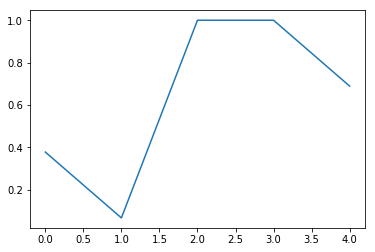

In [40]:
from sklearn import metrics
import matplotlib.pyplot as plt

# Our data is getting better and better the more decision trees we are adding.
plt.plot([metrics.r2_score(tennis_y, np.float64(np.mean(preds[:i+1], axis=0)>.5)) for i in range(trees)]);
plt.show()

In [22]:
i = 0
for t in rfclf.estimators_:
    export_graphviz(
        t,
        feature_names=tennis_x.columns,
        filled=True,
        rounded=True,
        out_file="tree{}.dot".format(i)
    )
    i += 1

Tree 1
------
![tree0](tree0.png)
Tree 2
------
![tree1](tree1.png)
Tree 3
------
![tree2](tree2.png)
Tree 4
------
![tree3](tree3.png)
Tree 5
------
![tree4](tree4.png)